In [14]:
import pandas as pd
import sys
sys.path.append("../")
import macrophages_analysis
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, KFold

## Data import

In [15]:
preprocessed_data_path = '../../20x_datasets/Preprocessed_data/'

nucleus_dataset_p4g4_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_206 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD206_TCPS_nucleus_dataset.csv')
all_surfaces_206 = pd.concat([nucleus_dataset_p4g4_206, nucleus_dataset_smooth_206, nucleus_dataset_tcps_206])

nucleus_dataset_p4g4_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_P4G4_nucleus_dataset.csv')
nucleus_dataset_smooth_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_Smooth_nucleus_dataset.csv')
nucleus_dataset_tcps_86 = pd.read_csv(preprocessed_data_path + 'clean_20x_CD86_TCPS_nucleus_dataset.csv')
all_surfaces_86 = pd.concat([nucleus_dataset_p4g4_86, nucleus_dataset_smooth_86, nucleus_dataset_tcps_86])

# 20x CD86 model on CD206 dataset. P4G4+TCPS+Smooth data
## 20x_CD86_model_CD206_data_all_surfaces_all_features

## Train XGBClassifier

In [16]:
pipe, test_data_86 = macrophages_analysis.make_nucleus_classifier(all_surfaces_86, confusion_matrix=False)

X_nucleus = all_surfaces_206.drop('CellType', axis=1)
y_nucleus = all_surfaces_206['CellType']

label_encoder = LabelEncoder()
y_nucleus = label_encoder.fit_transform(y_nucleus)

y_pred = pipe.predict(X_nucleus)
test_data_206 = (X_nucleus, y_nucleus)

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.8691188040912667
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.872597526057396
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.8693070746155362


--------
Mean accuracy of XGBClassifier (10-fold cross-validation) 0.9297013535673587
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.9352688320534884
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.9297823305212715


<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

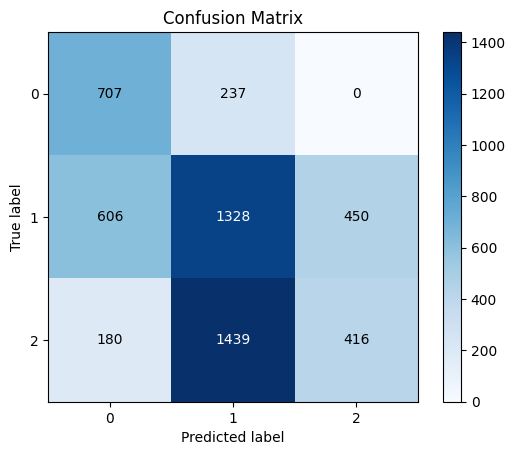

In [17]:
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus, cv=kf,scoring='f1_weighted')

print('--------')
print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')

Mean accuracy of XGBClassifier (10-fold cross-validation) 0.7072220444840105
Mean f1-macro of XGBClassifier (10-fold cross-validation) 0.7355070619450482
Mean f1_weighted of XGBClassifier (10-fold cross-validation) 0.7006914281628112


([<matplotlib.axis.YTick at 0x2029f5923d0>,
 [Text(0, 0, 'M1'), Text(0, 1, 'M2')])

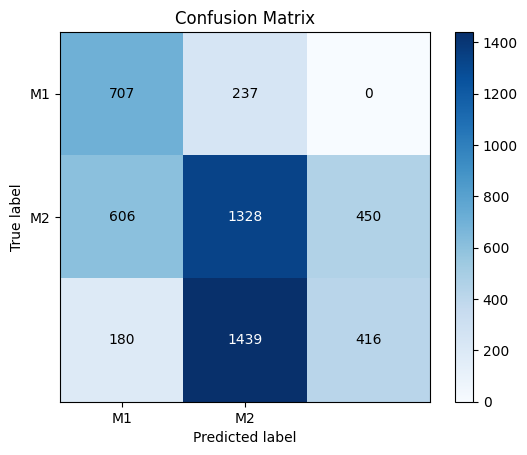

In [18]:
# Calculate accuracy and f1-macro scores using cross-validation
acc_scores = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='accuracy')
f1_macro = cross_val_score(pipe, X_nucleus, y_nucleus, scoring='f1_macro')
f1_weighted = cross_val_score(pipe, X_nucleus, y_nucleus,scoring='f1_weighted')

print('Mean accuracy of XGBClassifier (10-fold cross-validation)', sum(acc_scores) / len(acc_scores))
print('Mean f1-macro of XGBClassifier (10-fold cross-validation)', sum(f1_macro) / len(f1_macro))
print('Mean f1_weighted of XGBClassifier (10-fold cross-validation)', sum(f1_weighted) / len(f1_weighted))

y_pred = pipe.predict(X_nucleus)

skplt.metrics.plot_confusion_matrix(y_nucleus, y_pred, normalize=False, title='Confusion Matrix')
plt.xticks(range(2),['M1', 'M2'])
plt.yticks(range(2),['M1', 'M2'])

AUC score for M1 0.888525713310397
AUC score for M2 0.5023183819172687
AUC score for NT 0.6387826911264411
Average AUC 0.6765422621180356


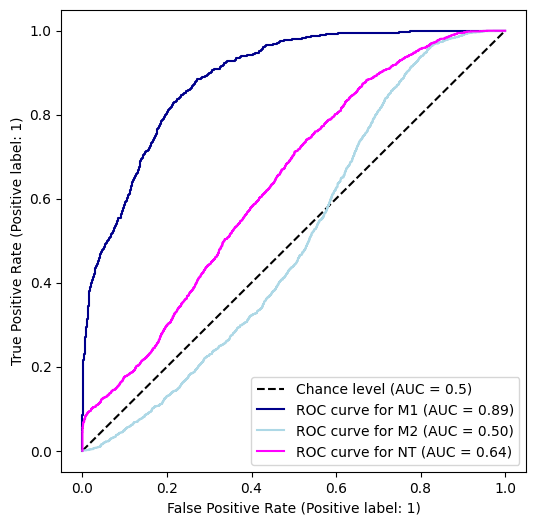

In [19]:
macrophages_analysis.make_multiclass_roc(pipe, test_data_206)

In [20]:
class_probabilities = pipe.predict_proba(X_nucleus)

C:\Users\golda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\golda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\golda\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\U

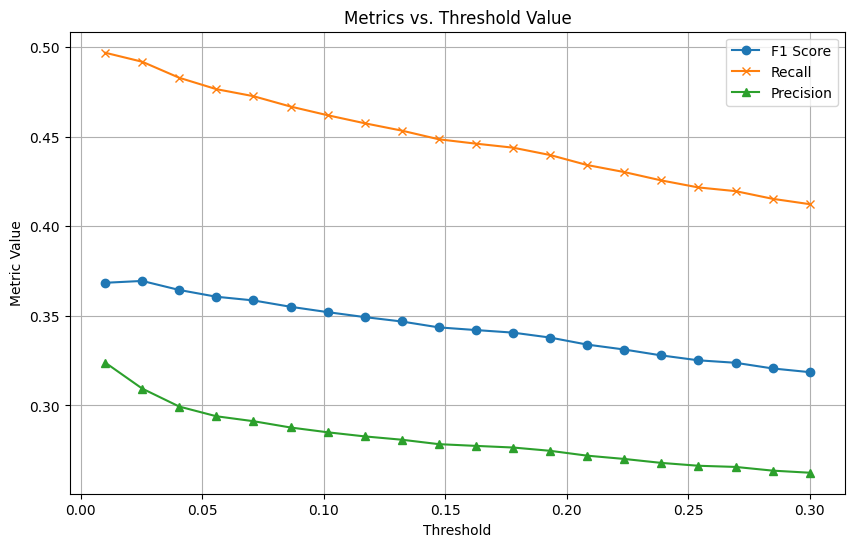

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Assuming you already have your `y_test` and `model_randomized` as in your code
# X_test should also be defined in your context
y_test = y_nucleus
thresholds = np.linspace(0.01, 0.3, 20)  # Vary threshold from 0.1 to 0.9 with 0.05 increments
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_test_pred = (class_probabilities[:, 1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred, average='weighted'))
    recalls.append(recall_score(y_test, y_test_pred, average='weighted'))
    precisions.append(precision_score(y_test, y_test_pred, average='weighted'))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, precisions, label='Precision', marker='^')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Threshold Value')
plt.legend()
plt.grid()
plt.show()

AUC score for M1 0.888525713310397
AUC score for M2 0.5023183819172687
Average AUC 0.6954220476138329


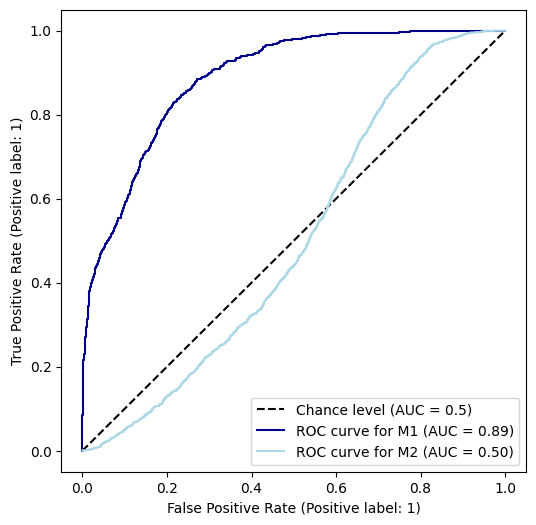

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scikitplot as skplt
import re
from xgboost import XGBClassifier
from itertools import cycle
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, confusion_matrix
from sklearn.utils import class_weight# Binarize the labels into one-hot encoded format
y_test = label_binarize(y_nucleus, classes=[0, 1, 2])

# Predict class probabilities using the classifier
class_probabilities = pipe.predict_proba(X_nucleus)[:, :2]

# Initialize empty lists for storing ROC curve data for each class
n_classes = 2
fpr = [0] * 2
tpr = [0] * 2
thresholds = [0] * 2
auc_score = [0] * 2

precision_scores = [0] * 2
recall_scores = [0] * 2
f1_scores = [0] * 2

# Calculate ROC curve and AUC for each class
for i in range(n_classes):
    fpr[i], tpr[i], thresholds[i] = roc_curve(y_test[:, i], class_probabilities[:, i])
    auc_score[i] = auc(fpr[i], tpr[i])

# Create a figure and axis for plotting
fig, ax = plt.subplots(figsize=(6, 6))

# Plot the chance level line (AUC = 0.5)
ax.plot([0, 1], [0, 1], "k--", label="Chance level (AUC = 0.5)")

# Define target names and colors for plotting ROC curves
target_names = ['M1', 'M2']
colors = cycle(["darkblue", "lightblue"])

# Plot ROC curves for each class
for class_id, color in zip(range(2), colors):
    RocCurveDisplay.from_predictions(
        y_test[:, class_id],
        class_probabilities[:, class_id],
        name=f"ROC curve for {target_names[class_id]}",
        color=color,
        ax=ax)

print('AUC score for M1', auc_score[0])
print('AUC score for M2', auc_score[1])
print('Average AUC', sum(auc_score) / n_classes)

In [23]:
mask = (y_nucleus != 2)
y_nucleus_m1m2 = y_nucleus[mask]
class_probabilities_m1m2 = class_probabilities[mask]

confusion_matrix(y_nucleus_m1m2, class_probabilities_m1m2[:, 0:1] > 0.2)

array([[ 153,  791],
       [1599,  785]], dtype=int64)

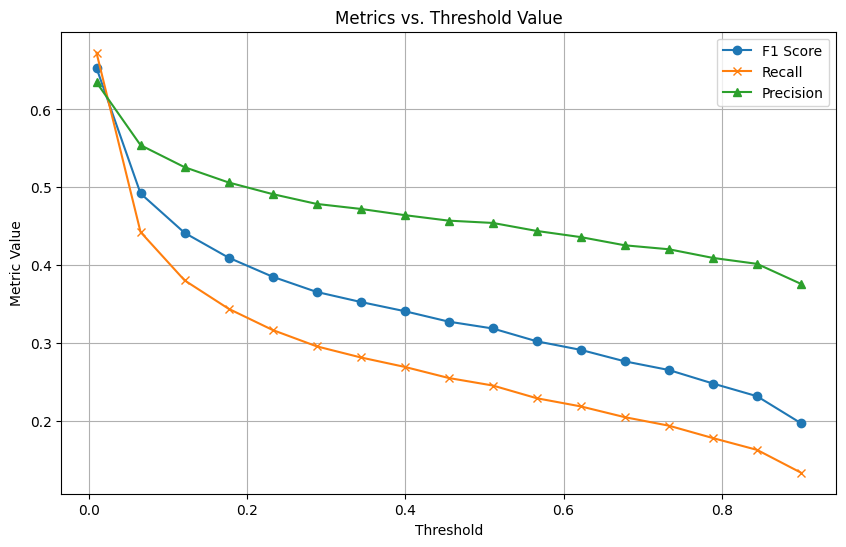

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.model_selection import train_test_split

# Assuming you already have your `y_test` and `model_randomized` as in your code
# X_test should also be defined in your context
y_test = y_nucleus_m1m2
thresholds = np.linspace(0.01, 0.9, 17)  # Vary threshold from 0.1 to 0.9 with 0.05 increments
f1_scores = []
recalls = []
precisions = []

for threshold in thresholds:
    y_test_pred = (class_probabilities_m1m2[:, 0:1] >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_test_pred))
    recalls.append(recall_score(y_test, y_test_pred))
    precisions.append(precision_score(y_test, y_test_pred))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(thresholds, f1_scores, label='F1 Score', marker='o')
plt.plot(thresholds, recalls, label='Recall', marker='x')
plt.plot(thresholds, precisions, label='Precision', marker='^')

plt.xlabel('Threshold')
plt.ylabel('Metric Value')
plt.title('Metrics vs. Threshold Value')
plt.legend()
plt.grid()
plt.show()

<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

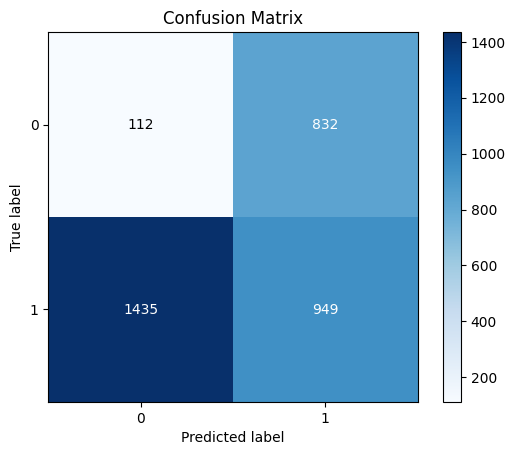

In [25]:
# In the lower left corner are:
# all M2 incorrectly classified as M1
# all M1 and M2 incorrectly classified as NT

skplt.metrics.plot_confusion_matrix(y_nucleus_m1m2, class_probabilities_m1m2[:, 0:1] > 0.1, normalize=False, title='Confusion Matrix')